In [115]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Exploration: 
##### Explore the data, list down the unique values in each feature and find its length.
##### Perform the statistical analysis and renaming of the columns.

In [116]:
#reading the csv file
df = pd.read_csv('Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [117]:
#Checking duplicates
df.duplicated().sum()

np.int64(4)

In [118]:
df[df.duplicated(keep=False)]

,Company,Age,Salary,Place,Country,Gender
22,TCS,21.0,4824.0,Mumbai,India,0
48,CTS,43.0,NaN,Mumbai,India,0
59,Infosys,NaN,5835.0,Mumbai,India,0
84,CTS,43.0,NaN,Mumbai,India,0
124,Infosys,22.0,8787.0,Calcutta,India,1
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [119]:
#length of dataset
len(df)

148

In [120]:
#Checking for null values
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [121]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [123]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [124]:
category_columns=['Company','Place', 'Country']
df[category_columns].nunique()

Company     6
Place      11
Country     1
dtype: int64

In [125]:
df['Company'].unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [126]:
df['Place'].unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [127]:
print(df[category_columns].count())

Company    140
Place      134
Country    148
dtype: int64


### Data Cleaning:

##### Find the missing and inappropriate values, treat them appropriately.

In [128]:
#Checking for null values
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [129]:
miss_perc = (df.isnull().sum()/len(df))*100
miss_perc

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

##### Remove all duplicate rows.

In [130]:
#Removing duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

##### Find the outliers.

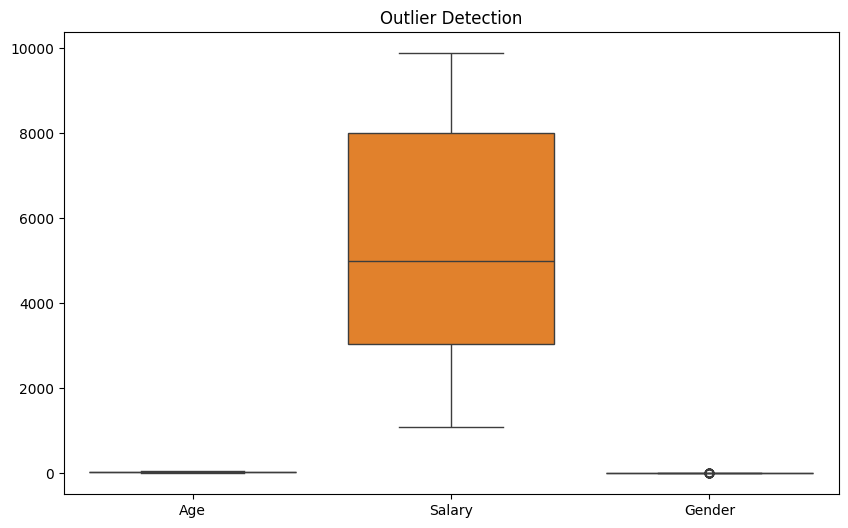

In [131]:
# Checking for outliers
numerical_columns = ['Age', 'Salary', 'Gender']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title('Outlier Detection')
plt.show()

##### Replace the value 0 in age as NaN

In [132]:
df['Age'] = df['Age'].replace(0, np.nan)

In [133]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


##### Treat the null values in all columns using any measures(removing/ replace the values with mean/median/mode)

In [134]:
# filling the missing values with median of each column
for col in ['Age','Salary']:
    df[col] = df[col].fillna(df[col].median())

In [135]:
df.head(3)

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0


In [136]:
# Fill NaN with the mode 
for col in ['Company','Place']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [137]:
df.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

### Data Analysis:
##### Filter the data with age >40 and salary<5000

In [138]:
filtered_df = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_df)

     Company   Age  Salary      Place Country  Gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


##### Plot the chart with age and salary

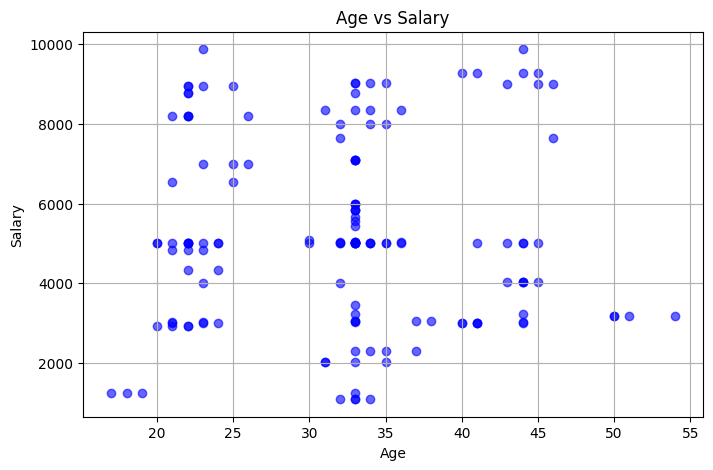

In [139]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Age'], df['Salary'], color='blue', alpha=0.6)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

##### Count the number of people from each place and represent it visually

In [140]:
place_counts = df['Place'].value_counts()
place_counts

Place
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

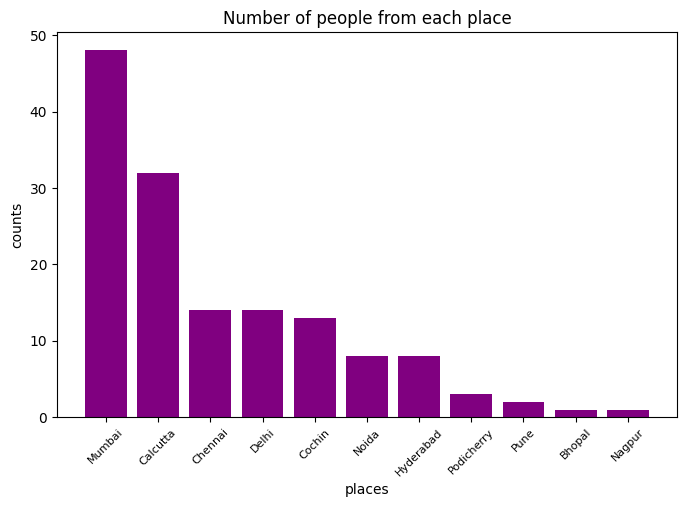

In [141]:
places = place_counts.index
counts = place_counts.values

plt.figure(figsize=(8, 5))
plt.bar(places, counts, color='purple')
plt.xlabel('places')
plt.ylabel('counts')
plt.title("Number of people from each place")
plt.xticks(rotation=45,fontsize=8)
plt.show()

### Data Encoding:
##### Convert categorical variables into numerical representations using techniques such as one-hot encoding, label encoding, making them suitable for analysis by machine learning algorithms.

In [142]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [143]:
# initializing one hot encoder 
encoder = OneHotEncoder()

In [159]:
encoded = ohe.fit_transform(df[['Place', 'Company']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Place', 'Company']))

In [161]:
df_numeric = df[['Age', 'Salary']]  # replace with your actual numeric columns
df_combined = pd.concat([df_numeric, encoded_df], axis=1)

In [162]:
df_combined

,Age,Salary,Place_Bhopal,Place_Calcutta,Place_Chennai,Place_Cochin,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services
0,20.0,5000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,30.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,2300.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40.0,3000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,23.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,33.0,5034.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,22.0,8202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
130,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Feature Scaling:
##### After the process of encoding, perform the scaling of the features using standardscaler and minmaxscaler.

In [155]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [153]:
# initializing Scaling
scaler = StandardScaler() 

In [163]:
# Apply StandardScaler
scaler_std = StandardScaler()
standard_scaled = scaler_std.fit_transform(df_combined)
standard_scaled_df = pd.DataFrame(standard_scaled, columns=df_combined.columns)

In [164]:
# Step 4: Apply MinMaxScaler
scaler_minmax = MinMaxScaler()
minmax_scaled = scaler_minmax.fit_transform(df_combined)
minmax_scaled_df = pd.DataFrame(minmax_scaled, columns=df_combined.columns)

In [165]:
print("Standard Scaled Features:\n", standard_scaled_df.head())

Standard Scaled Features:
         Age    Salary  Place_Bhopal  Place_Calcutta  Place_Chennai  \
0 -1.484676 -0.100827     -0.083624       -0.534522       3.047247   
1 -0.267174 -0.100827     -0.083624       -0.534522      -0.328165   
2  0.341577 -1.243735     -0.083624        1.870829      -0.328165   
3  0.950328 -0.947426     -0.083624       -0.534522      -0.328165   
4 -1.119426 -0.524127     -0.083624       -0.534522      -0.328165   

   Place_Cochin  Place_Delhi  Place_Hyderabad  Place_Mumbai  Place_Nagpur  \
0     -0.315018    -0.328165        -0.242536     -0.707107     -0.083624   
1     -0.315018    -0.328165        -0.242536      1.414214     -0.083624   
2     -0.315018    -0.328165        -0.242536     -0.707107     -0.083624   
3     -0.315018     3.047247        -0.242536     -0.707107     -0.083624   
4     -0.315018    -0.328165        -0.242536      1.414214     -0.083624   

   Place_Noida  Place_Podicherry  Place_Pune  Company_CTS  Company_Congnizant  \
0    -0.

In [166]:
print("\nMin-Max Scaled Features:\n", minmax_scaled_df.head())


Min-Max Scaled Features:
         Age    Salary  Place_Bhopal  Place_Calcutta  Place_Chennai  \
0  0.081081  0.445089           0.0             0.0            1.0   
1  0.351351  0.445089           0.0             0.0            0.0   
2  0.486486  0.137817           0.0             1.0            0.0   
3  0.621622  0.217480           0.0             0.0            0.0   
4  0.162162  0.331285           0.0             0.0            0.0   

   Place_Cochin  Place_Delhi  Place_Hyderabad  Place_Mumbai  Place_Nagpur  \
0           0.0          0.0              0.0           0.0           0.0   
1           0.0          0.0              0.0           1.0           0.0   
2           0.0          0.0              0.0           0.0           0.0   
3           0.0          1.0              0.0           0.0           0.0   
4           0.0          0.0              0.0           1.0           0.0   

   Place_Noida  Place_Podicherry  Place_Pune  Company_CTS  Company_Congnizant  \
0       